In [10]:
# imports requireed packages
from tensorflow.keras.applications import InceptionV3, ResNet50 # vgg16
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

 

# load images from the folder
image_path = "C:/Users/46057761/stylebook/HairstyleClasses1/train/images/" ##replace with the folder path that contains all images you want to put in the database


# loading all the images 
importedImages = []

#calculate number of images in the folder
number_files = [image_path + x for x in os.listdir(image_path) if ".jpg" in x]
print(len(number_files))

for f in number_files:
    filename = f
    load_resize_orginal_image = load_img(filename, target_size=(500, 500))
    numpy_image_array = img_to_array(load_resize_orginal_image)
    image_batch = np.expand_dims(numpy_image_array, axis=0)
    importedImages.append(image_batch)



757


In [13]:

images_import = np.vstack(importedImages)
processed_images = preprocess_input(images_import.copy())

   
#number of most similar images to retrieve
number_images_retrieve = 5

#loading of pretrained model
load_pretrained_model_weight = ResNet50(weights='imagenet')

#use this to extract features before the final layer
feature_extractor = Model(inputs=load_pretrained_model_weight.input,
                   outputs=load_pretrained_model_weight.get_layer("avg_pool").output)

 

In [29]:

import tensorflow as tf

# Assuming `processed_images` is your image array
processed_images = tf.image.resize(processed_images, [224, 224])

   
###extract features from processed_images
image_features = feature_extractor.predict(processed_images)

 
##save the array of the extracted features need to load into App
##only run when saving features extracted
np.save('images_feature.npy',image_features)

##load save image features 
#use when loading stored image features
image_features = np.load('images_feature.npy')

#compute the cosine similarity of the extracted features
Similarities = cosine_similarity(image_features)


# store the results into a pandas dataframe
cos_similarities = pd.DataFrame(Similarities, columns=number_files, index=number_files)
cos_similarities.to_csv('simi.csv',header ='true',encoding='utf-8')

# function to retrieve the most similar products for a given one
def retrieve_similar_images_based_on_features(input_image):
    model_width, model_height = 500,500
    original = load_img(input_image, target_size=(model_width,
                                                model_height))
    plt.imshow(original)
    plt.show()

 

    print("-"*100)
    print("images with similar features or colours:")
    closest_similar_image = cos_similarities[input_image].sort_values(ascending=False)[1:number_images_retrieve+10].index

 

    closest_similar_image_scores = cos_similarities[input_image].sort_values(ascending=False)[1:number_images_retrieve+10]



 

    for i in range(0,len(closest_similar_image)):
        original = load_img(closest_similar_image[i],
                            target_size=(model_width, model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_similar_image_scores[i])

 





24/24 [==============================] - 42s 2s/step


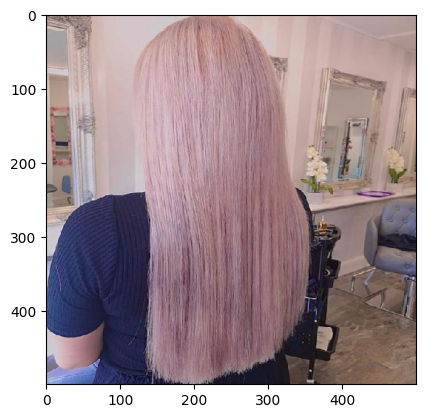

----------------------------------------------------------------------------------------------------
images with similar features or colours:


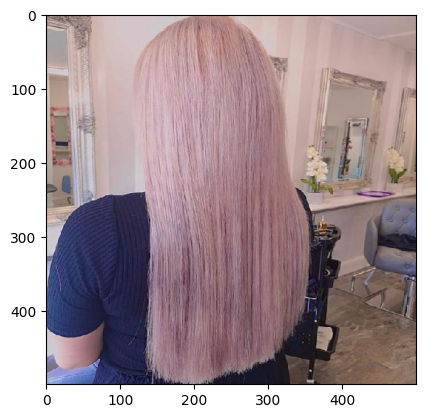

similarity score :  1.0


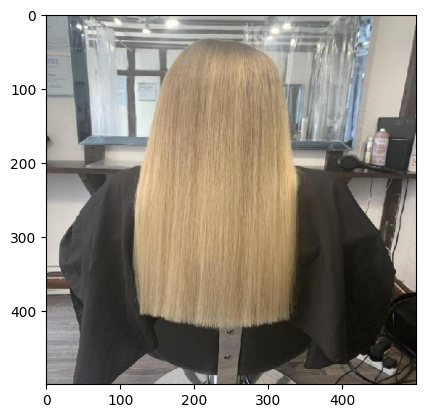

similarity score :  0.7914879


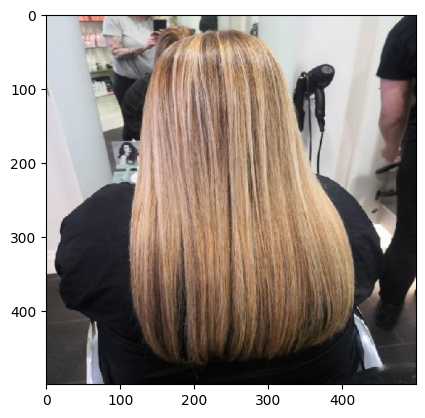

similarity score :  0.75858414


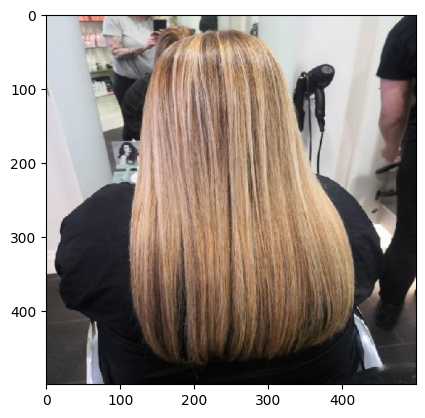

similarity score :  0.75858414


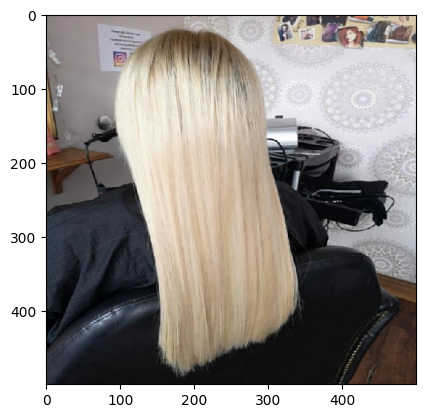

similarity score :  0.73758274


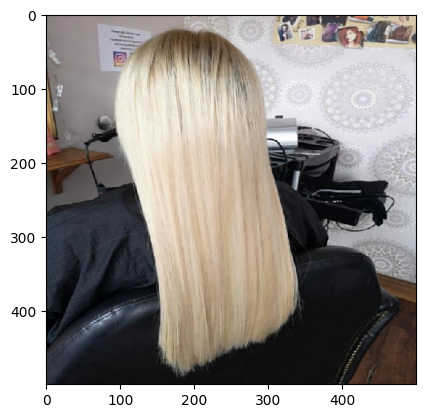

similarity score :  0.73758274


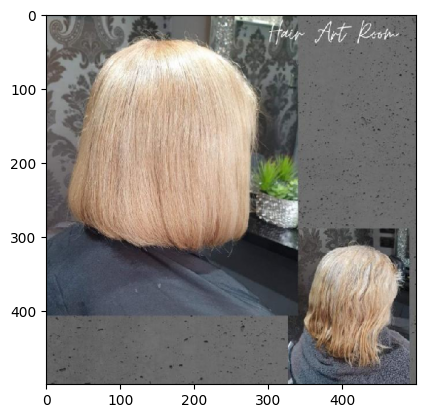

similarity score :  0.72860265


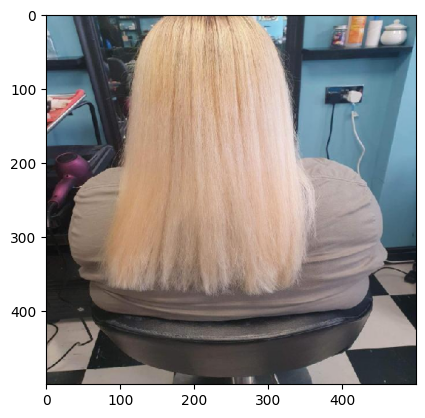

similarity score :  0.71775335


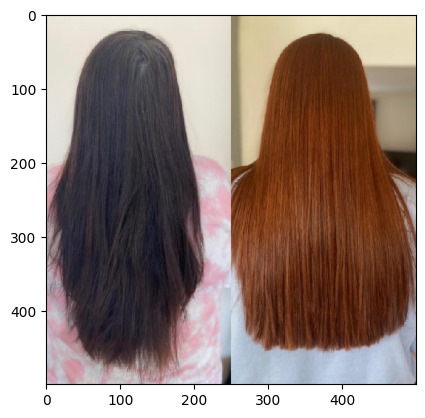

similarity score :  0.7143976


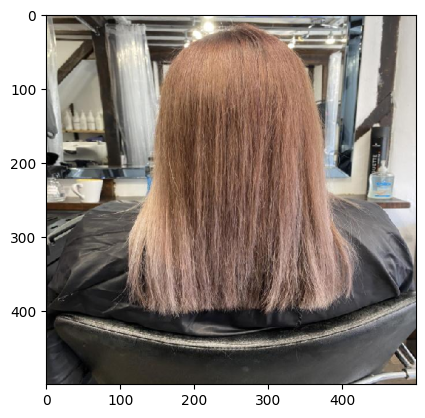

similarity score :  0.71341723


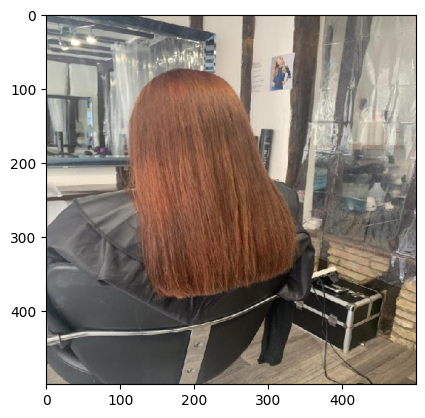

similarity score :  0.70867616


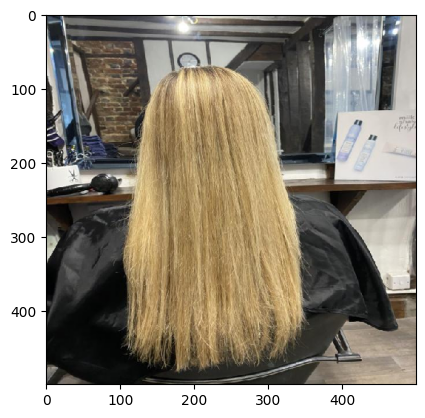

similarity score :  0.70350796


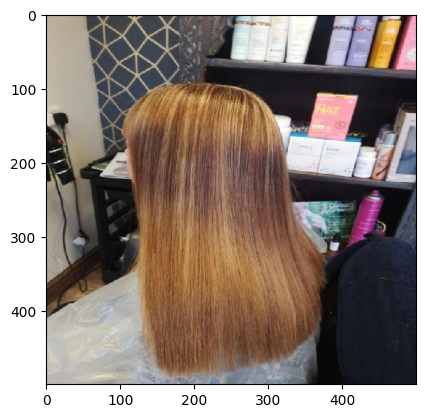

similarity score :  0.7029642


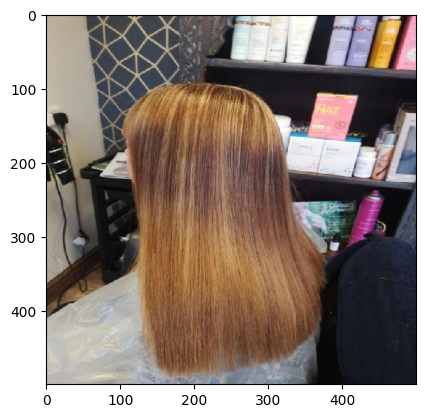

similarity score :  0.7029642


In [28]:
retrieve_similar_images_based_on_features(number_files[100])

In [25]:
def add_new_image(image_path):
    global cos_similarities, number_files
    number_files.append(image_path)
    cos_similarities, number_files = load_images()

In [ ]:
image_file = uploaded_file.name
with open(image_file, 'wb') as f:
    f.write(uploaded_file.getbuffer())
add_new_image(image_file)

In [26]:
!pip install ipywidgets

  Using cached ipywidgets-8.0.6-py3-none-any.whl (138 kB)
  Using cached widgetsnbextension-4.0.7-py3-none-any.whl (2.1 MB)
  Using cached jupyterlab_widgets-3.0.7-py3-none-any.whl (198 kB)


In [27]:
import ipywidgets as widgets

def calculate_and_save_image_features(image_path):
    load_resize_orginal_image = load_img(image_path, target_size=(500, 500))
    numpy_image_array = img_to_array(load_resize_orginal_image)
    image_batch = np.expand_dims(numpy_image_array, axis=0)

    images = np.vstack([image_batch])
    processed_images = preprocess_input(images.copy())
    processed_images = tf.image.resize(processed_images, [224, 224])

    new_image_features = feature_extractor.predict(processed_images)

    # Append new features to the global image_features array
    global image_features
    image_features = np.vstack([image_features, new_image_features])

    # Recalculate and save cosine similarities
    Similarities = cosine_similarity(image_features)

    # Assuming you also have a list that keeps track of the image filenames
    global number_files
    number_files.append(image_path)
    cos_similarities = pd.DataFrame(Similarities, columns=number_files, index=number_files)
    cos_similarities.to_csv('simi.csv',header ='true',encoding='utf-8')

# Create file upload widget
uploader = widgets.FileUpload(multiple=False)

# Handle file upload
def on_file_upload(change):
    uploaded_file = list(uploader.value.values())[0]
    name = uploaded_file['metadata']['name']
    content = uploaded_file['content']

    with open(name, 'wb') as f:
        f.write(content)
    calculate_and_save_image_features(name)

uploader.observe(on_file_upload, names='value')

display(uploader)


FileUpload(value=(), description='Upload')